<a href="https://colab.research.google.com/github/mauliksavalia/CS682/blob/main/ML/ML_DroneSOH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-7-eeb266453e9f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(temp_df, ignore_index=True)
<ipython-input-7-eeb266453e9f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(temp_df, ignore_index=True)
<ipython-input-7-eeb266453e9f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(temp_df, ignore_index=True)
<ipython-input-7-eeb266453e9f>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(temp_df, ignore_index=True)
<ipython-input-7-eeb266453e9f>:15: FutureWarning: The frame.

Mean Squared Error (MSE) with Polynomial Features: 14.56
R-squared (R²) with Polynomial Features: 0.06


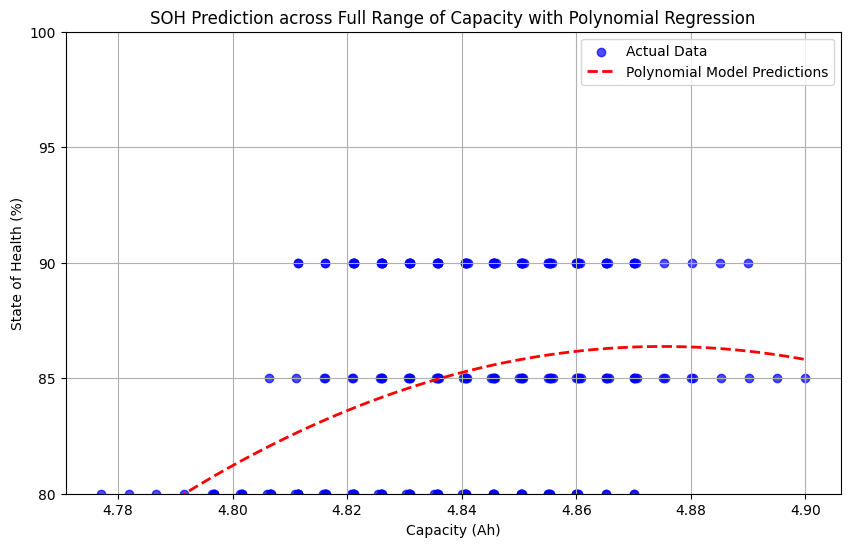

In [ ]:
# Load the Excel file
file_path = '/content/CapacityVsCycleNumber.xlsx'
xl = pd.ExcelFile(file_path)

# Combining data from specific sheets (80SOH, 85SOH, 90SOH)
selected_sheets = ['80SOH', '85SOH', '90SOH']
combined_data = pd.DataFrame()
for sheet_name in selected_sheets:
    df = xl.parse(sheet_name)
    soh_value = float(sheet_name.replace("SOH", "").strip())
    for i in range(1, df.shape[1], 2):
        temp_df = df[['CN', df.columns[i]]].copy()
        temp_df.columns = ['CycleNumber', 'Capacity']
        temp_df['SOH'] = soh_value
        combined_data = combined_data.append(temp_df, ignore_index=True)

# Data cleaning
combined_data.dropna(inplace=True)
combined_data['Capacity'] = pd.to_numeric(combined_data['Capacity'], errors='coerce')
combined_data.dropna(inplace=True)

# Preparing the data for the model
X = combined_data[['Capacity']]
y = combined_data['SOH']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with polynomial features and linear regression
degree = 2  # Degree of polynomial features
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the model's performance metrics
mse_poly = mean_squared_error(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

# Outputting the model's performance
print(f'Mean Squared Error (MSE) with Polynomial Features: {mse_poly:.2f}')
print(f'R-squared (R²) with Polynomial Features: {r2_poly:.2f}')

# Generating predictions across the full spectrum of capacity values
min_capacity = combined_data['Capacity'].min()
max_capacity = combined_data['Capacity'].max()
extended_capacity = np.linspace(min_capacity, max_capacity, 500).reshape(-1, 1)
extended_predictions = model.predict(extended_capacity)

# Plotting with polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Capacity'], combined_data['SOH'], color='blue', label='Actual Data', alpha=0.7)
plt.plot(extended_capacity, extended_predictions, color='red', label='Polynomial Model Predictions', linestyle='dashed', linewidth=2)
plt.title('SOH Prediction across Full Range of Capacity with Polynomial Regression')
plt.xlabel('Capacity (Ah)')
plt.ylabel('State of Health (%)')
plt.ylim(80, 100)  # Setting the y-axis limits
plt.yticks(np.arange(80, 101, 5))  # Setting the y-axis ticks
plt.legend()
plt.grid(True)
plt.show()